Use online database search to connect to pubmed

In [5]:
import urllib2
import os
import requests

In [215]:
def Search_Pub(terms):
    #from os.path import exists
    import requests
    #import os
    URL = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=json&retmax=20&sort=relevance&term=[' + terms +']'
    f = requests.get(URL)
    print(f)
    f2 = f.json()
    print f2
    
      
    str1 = ('')
    for i in xrange(0,len(f2['esearchresult']['idlist'])-1):
        str1 += str(f2['esearchresult']['idlist'][i] + ', ',)

    print(str1[:-2])
    return str((str1[:-2]))  #str1[0:len(str1)])
    
            


In [21]:
x=Search_Pub('fever')

In [185]:
pub_med_dict=x.json()
print y

{u'header': {u'version': u'0.3', u'type': u'esearch'}, u'esearchresult': {u'count': u'175787', u'retmax': u'20', u'idlist': [u'26179160', u'26149859', u'25800617', u'26436473', u'24902928', u'26196350', u'26024659', u'25104731', u'24406312', u'24132129', u'25502509', u'25779022', u'25703012', u'25456000', u'24917213', u'25929242', u'25727281', u'25445814', u'25733261', u'25690317'], u'translationstack': [{u'count': u'37295', u'field': u'MeSH Terms', u'term': u'"fever"[MeSH Terms]', u'explode': u'Y'}, {u'count': u'175778', u'field': u'All Fields', u'term': u'"fever"[All Fields]', u'explode': u'N'}, u'OR', u'GROUP'], u'translationset': [{u'to': u'"fever"[MeSH Terms] OR "fever"[All Fields]', u'from': u'fever'}], u'retstart': u'0', u'querytranslation': u'"fever"[MeSH Terms] OR "fever"[All Fields]'}}


In [30]:
z = y['esearchresult']['idlist']

In [184]:
def Extract_ids(pub_med_dict):
    str1 = ('')
    for i in xrange(0,len(pub_med_dict['esearchresult']['idlist'])-1):
        str1 += str(pub_med_dict['esearchresult']['idlist'][i] + ', ',)

returns(str1[:-2])#str1[0:len(str1)])

SyntaxError: invalid syntax (<ipython-input-184-0b26c42c400c>, line 1)

In [93]:
def Return_results(IDS):
    #from os.path import exists
    import requests
    URL2 = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id=' + IDS
    f2 = requests.get(URL2)
    print URL2
    #print(f2)
    return f2.content

In [94]:
x2=Return_results(z[0])



http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id=26179160


In [95]:
print(x2)

<?xml version="1.0"?>
<!DOCTYPE PubmedArticleSet PUBLIC "-//NLM//DTD PubMedArticle, 1st January 2016//EN" "http://www.ncbi.nlm.nih.gov/corehtml/query/DTD/pubmed_160101.dtd">
<PubmedArticleSet>
<PubmedArticle>
    <MedlineCitation Owner="NLM" Status="MEDLINE">
        <PMID Version="1">26179160</PMID>
        <DateCreated>
            <Year>2015</Year>
            <Month>09</Month>
            <Day>25</Day>
        </DateCreated>
        <DateCompleted>
            <Year>2015</Year>
            <Month>12</Month>
            <Day>18</Day>
        </DateCompleted>
        <Article PubModel="Print-Electronic">
            <Journal>
                <ISSN IssnType="Electronic">1545-5017</ISSN>
                <JournalIssue CitedMedium="Internet">
                    <Volume>62</Volume>
                    <Issue>11</Issue>
                    <PubDate>
                        <Year>2015</Year>
                        <Month>Nov</Month>
                    </PubDate>
                </Journal

In [123]:
#import minidom
#y2=x2.
#x2.content

import xml.etree.ElementTree as ET
#tree = ET.parse(x2)
#root = tree.getroot()
root = ET.fromstring(x2)

Title = root[0][0][3][1].text
Abstract = root[0][0][3][4][1].text

        

print (Title)
print(Abstract)

#print(abstract)

Adherence to prompt fever evaluation in children with sickle cell disease and the health belief model.
Cross-sectional survey based on health belief domains, Wake Forest trust scales, and self-reported adherence among 163 caregivers of children with SCD during routine hematology visit.


In [150]:
def getAbstract(xmlInput):
    abst=('')
    for i in range(4):
        abst += xmlInput[0][0][3][4][i].text
    return abst

def getAuthors(xmlInput):
    auth=('')
    for i in range(12):
        xmlInput[0][0][3][5][i]
        try:    
            auth += xmlInput[0][0][3][5][i][1].text + ', '
        except index.ValueError:
            break
        try:
            auth += xmlInput[0][0][3][5][i][2].text + ', '
        except index.ValueError:
            break
    return auth[0:(len(auth)-2)]



In [151]:
#getAbstract(root)
getAuthors(root)




NameError: global name 'index' is not defined

In [181]:
def get_pubmed_details(xml_input):

    from lxml import etree

    tree = etree.fromstring(x2)

    #Authors = ' '.join(tree.xpath('//abstract//text()'))
    Year = ' '.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/DateCompleted/Year/text()'))
    Title = ' '.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/Article/ArticleTitle/text()')).replace('\n', ' ')
    Abstract =  ' '.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/Article/Abstract/AbstractText/text()'))
    Keywords =  (','.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/KeywordList/Keyword/text()'))).lstrip()
    
    return {'Year': Year, 'Title': Title, 'Abstract': Abstract, 'Keywords': Keywords}

In [183]:

get_pubmed_details(x2)

2015
Adherence to prompt fever evaluation in children with sickle cell disease and the health belief model.
Children with sickle cell disease (SCD) are at increased risk of death from invasive bacterial infections. Emergent evaluation of fever allows early treatment of potentially fatal infections. Limited data exist regarding caregiver adherence to physician recommendations of prompt medical evaluation of fever in children with SCD. Better understanding of parental behavior around fever management may inform improved models for support in families of children with SCD. Cross-sectional survey based on health belief domains, Wake Forest trust scales, and self-reported adherence among 163 caregivers of children with SCD during routine hematology visit. Fifty-five percent of caregivers were adherent to fever evaluation recommendations as defined by "always" seeking medical evaluation of fever in their child with SCD. Perceived susceptibility to fever/infection, benefits of prompt evaluati

{'Abstract': 'Children with sickle cell disease (SCD) are at increased risk of death from invasive bacterial infections. Emergent evaluation of fever allows early treatment of potentially fatal infections. Limited data exist regarding caregiver adherence to physician recommendations of prompt medical evaluation of fever in children with SCD. Better understanding of parental behavior around fever management may inform improved models for support in families of children with SCD. Cross-sectional survey based on health belief domains, Wake Forest trust scales, and self-reported adherence among 163 caregivers of children with SCD during routine hematology visit. Fifty-five percent of caregivers were adherent to fever evaluation recommendations as defined by "always" seeking medical evaluation of fever in their child with SCD. Perceived susceptibility to fever/infection, benefits of prompt evaluation, and cues to action were significantly different between those who adhere to recommendation

# This is the tidied version of the various scripts.  

Function 1 searches for terms returning a string of PubMed ids.  
Function 2 looks up each ID, parses details, selects Year, Title, abstract and keywords out, putting them in pandas dataframe for analysis.

In [1]:
def Pubmed_search(terms):
    #from os.path import exists
    import requests
    #import os
    
    URL = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=json&retmax=100&sort=relevance&term=[' + terms.replace(' ','%20') +']'
    f = requests.get(URL)
    #print(f)
    f2 = f.json()
    #print f2
    
      
    str1 = ('')
    for i in xrange(0,len(f2['esearchresult']['idlist'])-1):
        str1 += str(f2['esearchresult']['idlist'][i] + ', ',)

    #print(str1[:-2])
    return (str1[:-2])  #str1[0:len(str1)])
    

In [6]:
def Pubmed_parser(xml_input):

    from lxml import etree

    tree = etree.fromstring(xml_input)

    #Authors = ' '.join(tree.xpath('//abstract//text()'))
    Year = ' '.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/DateCompleted/Year/text()'))
    Title = ' '.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/Article/ArticleTitle/text()')).replace('\n', ' ')
    Abstract =  ' '.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/Article/Abstract/AbstractText/text()'))
    Keywords =  (','.join(tree.xpath('//PubmedArticleSet/PubmedArticle/MedlineCitation/KeywordList/Keyword/text()'))).lstrip()
    
    return {'Year': Year, 'Title': Title, 'Abstract': Abstract, 'Keywords': Keywords}

In [12]:
def Pub_article_search(terms):
    
    import pandas as pd
    
    id_string = Pubmed_search(terms)
    id_string2 = id_string.split()
    
    out_lst = []#{}     
    for ids in id_string2:
        #print ids
        import requests
        URL2 = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id=' + ids
        f2 = requests.get(URL2)
        #print URL2
    
        dict_parse = Pubmed_parser(f2.content)
        
        row = {'Ids': ids, 'Year': dict_parse['Year'], 'Title': dict_parse['Title'], 'Abstract': dict_parse['Abstract'], 'Keywords': dict_parse['Keywords']}
        
        #print(row)
        out_lst.append(row)
        #out_lst[ids] = row
        
        #print (out_lst)
        
        #print (pd.DataFrame(out_lst))
        #print out_lst
    return pd.DataFrame(out_lst)
    

In [15]:
%matplotlib inline

Year
2014    13
2015    76
2016    10
Name: Ids, dtype: int64


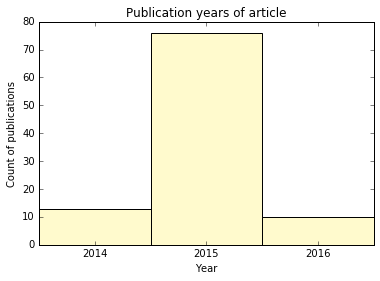

In [52]:
import matplotlib.pyplot as plt
import numpy as np

print(tst1.groupby('Year')['Ids'].count())

#plt.hist(tst1.groupby('Year')['Ids'].count(), bins = 3, color='LemonChiffon', label = ['2014', '2015', '2016'])

fig, ax=plt.subplots()
ax.bar([2014, 2015, 2016], tst1.groupby('Year')['Ids'].count(), width = 1, color='LemonChiffon')


ax.set_xticks([2014.5,2015.5,2016.5])
ax.set_xticklabels([2014,2015,2016])
ax.set_title('Publication years of article')
ax.set_xlabel('Year')
ax.set_ylabel('Count of publications')


ValueError: color kwarg must have one color per dataset

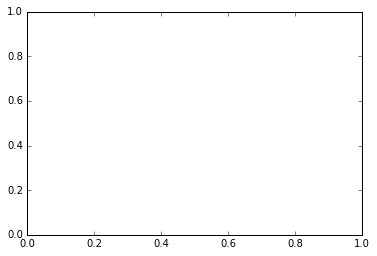

In [70]:
plt.hist(tst1['Year'], bins = 3, color='LemonChiffon', label = ['2014', '2015', '2016'])

In [80]:
#print(tst1)
#print(tst1['Abstract'])

otp=('')

for i in tst1['Abstract']:
    otp += i
    
print(otp)

Children with sickle cell disease (SCD) are at increased risk of death from invasive bacterial infections. Emergent evaluation of fever allows early treatment of potentially fatal infections. Limited data exist regarding caregiver adherence to physician recommendations of prompt medical evaluation of fever in children with SCD. Better understanding of parental behavior around fever management may inform improved models for support in families of children with SCD. Cross-sectional survey based on health belief domains, Wake Forest trust scales, and self-reported adherence among 163 caregivers of children with SCD during routine hematology visit. Fifty-five percent of caregivers were adherent to fever evaluation recommendations as defined by "always" seeking medical evaluation of fever in their child with SCD. Perceived susceptibility to fever/infection, benefits of prompt evaluation, and cues to action were significantly different between those who adhere to recommendations versus those

In [ ]:
words = {}

f
print[words]